<a href="https://colab.research.google.com/github/JorgeACM/kalman-filter/blob/codelab/Kalman_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Filtro de Kalman


$s(n)=as(n-1)+u(n)$

$s(n)$ = realización del proceso Gauss-Marcov <br>
$u(n)$ = Ruido< <br>
$a$ = constante del proceso <br>

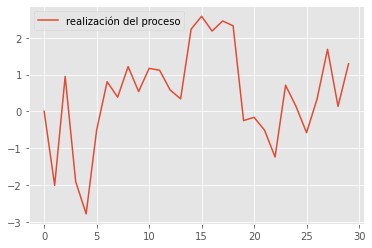

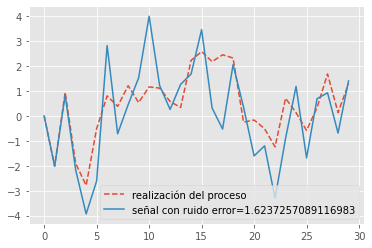

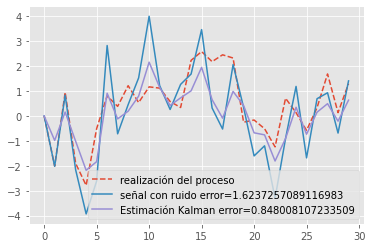

In [14]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# generar una realización del proceso aleatorio
# un modelo Gauss-Marcov
N = 30  # tamaño de la señal
a = 0.5  # valor de la cte del proceso
sigma_u = 1  # varianza del proceso

s = np.zeros(N)  # Inicializar la señal

# construir la señal
for n in np.arange(1, N):
  s[n] = a*s[n-1]+np.random.randn(1)*sigma_u

plt.plot(s, label='realización del proceso')
plt.legend()
plt.show()

# generar la señal con ruido a partir de la realización
sigma_n = 1.2
sr = np.zeros(N)
# agregar ruido
for n in np.arange(1, N):
  sr[n] = s[n]++np.random.randn(1)*sigma_n

#calcular el MSE min square error, entre la señal con ruido y la original
errorR = ((sr-s)**2).mean()
plt.plot(s, '--', label='realización del proceso')
plt.plot(sr, label='señal con ruido error='+str(errorR))
plt.legend()
plt.show()

#construir el filtro de Kalman
s_pred=0
M=0
s_hat=np.zeros(N)

for n in np.arange(N):
  #predicción
  s_pred=a*s_pred
  error=sr[n]-s_pred
  #calcular Predicción de mínimo MSE
  M=a**2*M+sigma_u
  #Calcular ganancia de Kalman
  K=M/(sigma_n+M)
  #Calcular estimador en base a la corrección
  #de la predicción
  s_pred=s_pred+K*error
  s_hat[n]=s_pred
  #actualizar mínimo MSE
  M=(1-K)*M

#Calcular el MSE de la estimación
errorK=((s_hat-s)**2).mean()

plt.plot(s, '--', label='realización del proceso')
plt.plot(sr, label='señal con ruido error='+str(errorR))
plt.plot(s_hat, label='Estimación Kalman error='+str(errorK))
plt.legend()
plt.show()




